In [2]:
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, ConvLSTM2D, Dropout
from keras.layers import LSTM, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

C:\Users\ASUS\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [2]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df = pd.read_csv('C:/Users/ASUS/Desktop/df2.csv', parse_dates = ['TmStamp'], index_col='TmStamp')

In [3]:

print(df.head(13))

            Rain_mm_Tot  AirTC_Avg     RH_Max  WS_ms_Avg    SlrW_Avg  \
TmStamp                                                                
2011-09-22     0.381000  16.115000  75.311250   0.571000   83.854173   
2011-09-23     0.031750  13.330000  90.016250   0.279958  116.861221   
2011-09-24     0.825500  10.506750  97.483333   0.291167   71.418419   
2011-09-25     0.137583  13.065000  99.450000   0.196208   37.946483   
2011-09-26     0.825417  15.823750  85.546667   0.862958  189.470915   
2011-09-27     0.592667  11.846250  96.683333   0.484583   40.154701   
2011-09-28     0.592667  12.904583  99.387500   0.331208   61.655771   
2011-09-29     0.254000  13.797917  94.862917   0.902625  124.851484   
2011-09-30     0.116417  10.500792  87.068750   2.620667   84.260950   
2011-10-01     0.000000   7.298667  80.373333   1.471333  168.638122   
2011-10-02     0.000000   8.175875  75.212500   1.208083  210.594264   
2011-10-03     0.000000  11.040833  74.843333   0.729625  211.78

In [4]:
split = len(df)-365*2
test = df.iloc[split:]
train= df.iloc[:split,]


In [5]:
len(test)

730

In [6]:
train_dates = pd.to_datetime(train.index)

In [7]:
test_dates = pd.to_datetime(test.index)

In [8]:
cols = list(df)[0:7]
print(cols)

['Rain_mm_Tot', 'AirTC_Avg', 'RH_Max', 'WS_ms_Avg', 'SlrW_Avg', 'VWC_1ft_Avg']


In [9]:
cols_train = list(train)[0:7] 
print(cols_train)

['Rain_mm_Tot', 'AirTC_Avg', 'RH_Max', 'WS_ms_Avg', 'SlrW_Avg', 'VWC_1ft_Avg']


In [10]:
cols_test = list(test)[0:7] 
print(cols_test)

['Rain_mm_Tot', 'AirTC_Avg', 'RH_Max', 'WS_ms_Avg', 'SlrW_Avg', 'VWC_1ft_Avg']


In [11]:
test.head()

,Rain_mm_Tot,AirTC_Avg,RH_Max,WS_ms_Avg,SlrW_Avg,VWC_1ft_Avg
TmStamp,,,,,,
2019-09-11,0.000000,24.962500,90.799583,0.472250,191.330467,0.252292
2019-09-12,0.000000,24.054583,93.420000,0.371083,162.856077,0.250917
2019-09-13,0.000000,23.768333,88.357083,1.045667,176.308774,0.248958
2019-09-14,0.000000,18.862500,85.777917,0.656917,237.673990,0.245917
2019-09-15,0.074083,19.025000,92.919167,0.273625,104.657911,0.243583


In [12]:
df_for_training = train[cols_train].astype(float)
df_for_training

,Rain_mm_Tot,AirTC_Avg,RH_Max,WS_ms_Avg,SlrW_Avg,VWC_1ft_Avg
TmStamp,,,,,,
2011-09-22,0.381000,16.115000,75.311250,0.571000,83.854173,0.236875
2011-09-23,0.031750,13.330000,90.016250,0.279958,116.861221,0.236625
2011-09-24,0.825500,10.506750,97.483333,0.291167,71.418419,0.236000
2011-09-25,0.137583,13.065000,99.450000,0.196208,37.946483,0.235458
2011-09-26,0.825417,15.823750,85.546667,0.862958,189.470915,0.235000
...,...,...,...,...,...,...
2019-09-06,0.010583,16.337917,96.029167,0.565042,78.072128,0.261000
2019-09-07,0.000000,18.741250,89.416667,0.865625,233.577165,0.259417
2019-09-08,0.010583,16.416667,97.654167,0.213667,67.176316,0.258000


In [13]:
df_for_test = test[cols_test].astype(float)
df_for_test

,Rain_mm_Tot,AirTC_Avg,RH_Max,WS_ms_Avg,SlrW_Avg,VWC_1ft_Avg
TmStamp,,,,,,
2019-09-11,0.000000,24.962500,90.799583,0.472250,191.330467,0.252292
2019-09-12,0.000000,24.054583,93.420000,0.371083,162.856077,0.250917
2019-09-13,0.000000,23.768333,88.357083,1.045667,176.308774,0.248958
2019-09-14,0.000000,18.862500,85.777917,0.656917,237.673990,0.245917
2019-09-15,0.074083,19.025000,92.919167,0.273625,104.657911,0.243583
...,...,...,...,...,...,...
2021-09-05,0.000000,20.444167,80.945417,0.743125,154.181250,0.296792
2021-09-06,0.000000,19.306667,74.061667,0.564917,153.628583,0.293375
2021-09-07,0.042333,20.515000,79.010833,0.731625,138.034792,0.289333


In [14]:
# xscaler = StandardScaler()
# yscaler = StandardScaler()
# scalerx= xscaler.fit(df_train_x)
# scalery= xscaler.fit(df_train_y)
# df_for_training_scaled_x = yscalerx.transform(df_train_x)
# df_for_training_scaled_y = scalery.transform(df_train_y)


scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
# df_for_training_scaled_y = Y_scaler.fit_transform(train[['VWC_1ft_Avg']])

In [15]:

scaler1 = scaler.fit(df_for_test)
df_for_test_scaled = scaler1.transform(df_for_test)


In [16]:
trainX = []
trainY=[]


In [17]:
testX = []
testY=[]

In [18]:
n_future= 1
n_past=7

In [19]:
df_train = scaler.inverse_transform(df_for_training_scaled)

In [20]:
for i in range (n_past, len(df_for_training_scaled) - n_future +1):
#     print(df_for_training_scaled[i-n_past:i, 0:df_for_training_scaled.shape[1]])
#     print(df_train[i + n_future -1:i+n_future, 8])
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_scaled.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future -1:i+n_future, 5])

In [21]:
for i in range (n_past, len(df_for_test_scaled) - n_future +1):
#     print(df_for_training_scaled[i-n_past:i, 0:df_for_training_scaled.shape[1]])
#     print(df_train[i + n_future -1:i+n_future, 8])
    testX.append(df_for_test_scaled[i - n_past:i, 0:df_for_test_scaled.shape[1]])
    testY.append(df_for_test_scaled[i + n_future -1:i+n_future, 5])

In [22]:
print(df_for_test_scaled[i + n_future -1:i+n_future, 5])

[0.38688911]


In [23]:
testX[0].shape
len(testY)

723

In [24]:
trainX, trainY = np.array(trainX), np.array(trainY)
print(trainX)

[[[0.12543898 0.7152687  0.56443468 0.14579034 0.22532792 0.23046811]
  [0.01045325 0.66505912 0.8238641  0.07148024 0.31402249 0.22948948]
  [0.27178446 0.61415994 0.95560031 0.07434201 0.19191131 0.2270429 ]
  ...
  [0.27175702 0.71001788 0.74501055 0.22033448 0.50913492 0.22312836]
  [0.1951273  0.63830922 0.94148651 0.12372604 0.10790131 0.22622737]
  [0.1951273  0.65738946 0.98919412 0.08456563 0.1656777  0.25199804]]

 [[0.01045325 0.66505912 0.8238641  0.07148024 0.31402249 0.22948948]
  [0.27178446 0.61415994 0.95560031 0.07434201 0.19191131 0.2270429 ]
  [0.04529741 0.66028155 0.99029676 0.05009681 0.10196752 0.22492252]
  ...
  [0.1951273  0.63830922 0.94148651 0.12372604 0.10790131 0.22622737]
  [0.1951273  0.65738946 0.98919412 0.08456563 0.1656777  0.25199804]
  [0.08362599 0.67349499 0.90937024 0.23046235 0.33549344 0.47724678]]

 [[0.27178446 0.61415994 0.95560031 0.07434201 0.19191131 0.2270429 ]
  [0.04529741 0.66028155 0.99029676 0.05009681 0.10196752 0.22492252]
  [0

In [25]:
print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

trainX shape ==(2876, 7, 6).
trainY shape ==(2876, 1).


In [26]:
testX, testY = np.array(testX), np.array(testY)
testX

array([[[0.        , 0.95165521, 0.88978395, 0.11570959, 0.29971519,
         0.261266  ],
        [0.        , 0.9290639 , 0.92117513, 0.08405049, 0.25511065,
         0.25547957],
        [0.        , 0.92194126, 0.86052411, 0.29515464, 0.27618402,
         0.2472383 ],
        ...,
        [0.03664921, 0.80391486, 0.91517542, 0.05355187, 0.16394444,
         0.22461862],
        [0.        , 0.84941889, 0.9087714 , 0.0883143 , 0.2377695 ,
         0.21742942],
        [0.        , 0.80804122, 0.91384769, 0.09329526, 0.23986318,
         0.21059092]],

       [[0.        , 0.9290639 , 0.92117513, 0.08405049, 0.25511065,
         0.25547957],
        [0.        , 0.92194126, 0.86052411, 0.29515464, 0.27618402,
         0.2472383 ],
        [0.        , 0.79987144, 0.82962708, 0.17349919, 0.37231135,
         0.23443802],
        ...,
        [0.        , 0.84941889, 0.9087714 , 0.0883143 , 0.2377695 ,
         0.21742942],
        [0.        , 0.80804122, 0.91384769, 0.09329526, 0.239

In [27]:
print(trainX[1])
print(trainY[0])

[[0.01045325 0.66505912 0.8238641  0.07148024 0.31402249 0.22948948]
 [0.27178446 0.61415994 0.95560031 0.07434201 0.19191131 0.2270429 ]
 [0.04529741 0.66028155 0.99029676 0.05009681 0.10196752 0.22492252]
 [0.27175702 0.71001788 0.74501055 0.22033448 0.50913492 0.22312836]
 [0.1951273  0.63830922 0.94148651 0.12372604 0.10790131 0.22622737]
 [0.1951273  0.65738946 0.98919412 0.08456563 0.1656777  0.25199804]
 [0.08362599 0.67349499 0.90937024 0.23046235 0.33549344 0.47724678]]
[0.47724678]


In [28]:
from tensorflow.keras import backend as K
def r2_keras(transtrain_labels_true, transtrain_labels_pred):
    SS_res =  K.sum(K.square(transtrain_labels_true - transtrain_labels_pred)) 
    SS_tot = K.sum(K.square(transtrain_labels_true - K.mean(transtrain_labels_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [29]:
model = Sequential()
model.add(LSTM(128,activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64,activation='tanh', return_sequences=True))
model.add(LSTM(32,activation='tanh', return_sequences=False))
model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [30]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.01 and logs.get('val_loss')<0.01):
      print("\nReached max accuracy so cancelling training!")
      self.model.stop_training = True

In [31]:
callbacks= myCallback()

In [32]:
model.compile(optimizer='adam', loss='mae', metrics=['MeanAbsolutePercentageError','mse', 'mae', r2_keras])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 64)             49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 132,033
Trainable params: 132,033
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(trainX, trainY, epochs=90,steps_per_epoch=120, batch_size=16, validation_split=0.2, verbose=1, callbacks= [callbacks])

Epoch 1/90
120/120 [==============================] - 3s 26ms/step - loss: 0.1035 - mean_absolute_percentage_error: 46.2002 - mse: 0.0339 - mae: 0.1035 - r2_keras: 0.3883 - val_loss: 0.0788 - val_mean_absolute_percentage_error: 11.0448 - val_mse: 0.0084 - val_mae: 0.0788 - val_r2_keras: -43.5790
Epoch 2/90
120/120 [==============================] - 2s 13ms/step - loss: 0.0452 - mean_absolute_percentage_error: 45175.5703 - mse: 0.0042 - mae: 0.0452 - r2_keras: 0.9272 - val_loss: 0.0519 - val_mean_absolute_percentage_error: 6.4412 - val_mse: 0.0049 - val_mae: 0.0519 - val_r2_keras: -35.0930
Epoch 3/90
120/120 [==============================] - 1s 12ms/step - loss: 0.0402 - mean_absolute_percentage_error: 11.1155 - mse: 0.0034 - mae: 0.0402 - r2_keras: 0.9441 - val_loss: 0.0369 - val_mean_absolute_percentage_error: 4.8675 - val_mse: 0.0033 - val_mae: 0.0369 - val_r2_keras: -6.5996
Epoch 4/90
120/120 [==============================] - 1s 12ms/step - loss: 0.0385 - mean_absolute_percentage_

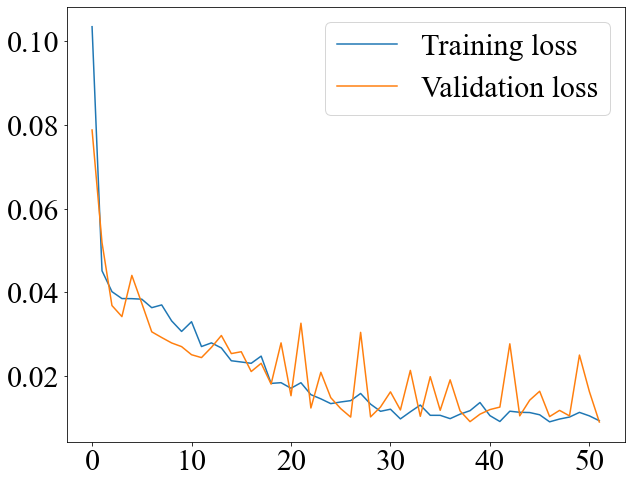

In [34]:

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 30, 'font.family':'Times New Roman'})
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

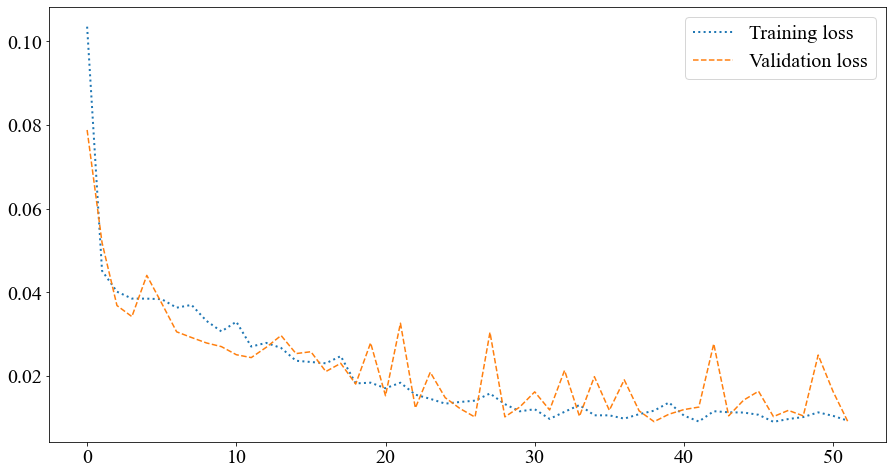

In [35]:
from matplotlib import style
# plt.style.use('None')
width = 15
height = 8
plt.figure(figsize=(width,height))
plt.rcParams.update({'font.size': 20, 'font.family':'Times New Roman'})
plt.plot(history.history['loss'], label='Training loss', linestyle=":", linewidth=2)
plt.plot(history.history['val_loss'], label='Validation loss',linestyle="--")
plt.legend()
plt.show()

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mean_absolute_percentage_error,mse,mae,r2_keras,val_loss,val_mean_absolute_percentage_error,val_mse,val_mae,val_r2_keras,epoch
42,0.011587,3.138668,0.000434,0.011587,0.992187,0.027705,3.409152,0.001196,0.027705,-12.388602,42
43,0.011328,8033.165527,0.000405,0.011328,0.993505,0.010480,1.439653,0.000395,0.010480,0.541729,43
44,0.011268,3.784686,0.000370,0.011268,0.993564,0.014230,1.784369,0.000480,0.014230,-0.649996,44
45,0.010733,5412.536133,0.000466,0.010733,0.992946,0.016359,2.210349,0.000505,0.016359,-0.564425,45
46,0.009046,3451.507080,0.000351,0.009046,0.993983,0.010299,1.297339,0.000425,0.010299,-0.094274,46
47,0.009714,3047.988525,0.000394,0.009714,0.993521,0.011785,1.556957,0.000399,0.011785,0.169240,47
48,0.010192,3858.335205,0.000363,0.010192,0.994203,0.010473,1.332562,0.000460,0.010473,0.217451,48
49,0.011306,162.448944,0.000425,0.011306,0.993540,0.025015,3.076743,0.001029,0.025015,-8.573907,49
50,0.010469,9455.739258,0.000444,0.010469,0.992650,0.016272,1.944782,0.000600,0.016272,-3.735330,50
51,0.009306,4971.350098,0.000297,0.009306,0.994924,0.008999,1.155212,0.000375,0.008999,0.313577,51


In [37]:
a= min(history.history['loss'])
a1= min(history.history['val_loss'])
print (a ,a1)

0.009046419523656368 0.00899882148951292


In [41]:
n_predict = len(testX)+8

predict_period_dates = pd.date_range(list(train_dates)[-1], periods= n_predict, freq= 'D').tolist()
predict_period_dates = predict_period_dates[+8:]
predict_period_dates

[Timestamp('2019-09-18 00:00:00', freq='D'),
 Timestamp('2019-09-19 00:00:00', freq='D'),
 Timestamp('2019-09-20 00:00:00', freq='D'),
 Timestamp('2019-09-21 00:00:00', freq='D'),
 Timestamp('2019-09-22 00:00:00', freq='D'),
 Timestamp('2019-09-23 00:00:00', freq='D'),
 Timestamp('2019-09-24 00:00:00', freq='D'),
 Timestamp('2019-09-25 00:00:00', freq='D'),
 Timestamp('2019-09-26 00:00:00', freq='D'),
 Timestamp('2019-09-27 00:00:00', freq='D'),
 Timestamp('2019-09-28 00:00:00', freq='D'),
 Timestamp('2019-09-29 00:00:00', freq='D'),
 Timestamp('2019-09-30 00:00:00', freq='D'),
 Timestamp('2019-10-01 00:00:00', freq='D'),
 Timestamp('2019-10-02 00:00:00', freq='D'),
 Timestamp('2019-10-03 00:00:00', freq='D'),
 Timestamp('2019-10-04 00:00:00', freq='D'),
 Timestamp('2019-10-05 00:00:00', freq='D'),
 Timestamp('2019-10-06 00:00:00', freq='D'),
 Timestamp('2019-10-07 00:00:00', freq='D'),
 Timestamp('2019-10-08 00:00:00', freq='D'),
 Timestamp('2019-10-09 00:00:00', freq='D'),
 Timestamp

In [42]:
len(testX)

723

In [43]:
forecast = model.predict(testX)
forecast

array([[0.21076304],
       [0.20005812],
       [0.18861453],
       [0.17958856],
       [0.17265913],
       [0.16111931],
       [0.1739932 ],
       [0.15587354],
       [0.1566461 ],
       [0.1495694 ],
       [0.1839988 ],
       [0.39841235],
       [0.40993962],
       [0.4156305 ],
       [0.40898502],
       [0.41047087],
       [0.40211806],
       [0.3915011 ],
       [0.3857937 ],
       [0.38573226],
       [0.3767316 ],
       [0.36809006],
       [0.36014858],
       [0.35231146],
       [0.36249962],
       [0.3411844 ],
       [0.3356814 ],
       [0.3236883 ],
       [0.3207055 ],
       [0.32099196],
       [0.31391644],
       [0.308245  ],
       [0.30841237],
       [0.30624428],
       [0.37655526],
       [0.34948334],
       [0.35250878],
       [0.35774127],
       [0.36216736],
       [0.5157647 ],
       [0.85253584],
       [0.80855083],
       [0.8053723 ],
       [0.8147007 ],
       [0.9398581 ],
       [0.8597636 ],
       [0.86071223],
       [0.838

In [44]:
len(forecast)

723

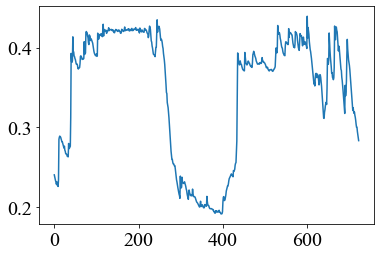

In [45]:
forecast_copies = np.repeat(forecast,df_for_training.shape[1], axis= 1)

forecast_copies
y_pred_future = scaler.inverse_transform(forecast_copies)
y = [row[5] for row in y_pred_future]
plt.plot(y)

In [46]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [47]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'VWC_1ft_Avg':y})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

In [48]:
df_forecast

,date,VWC_1ft_Avg
0,2019-09-18,0.240291
1,2019-09-19,0.237747
2,2019-09-20,0.235028
3,2019-09-21,0.232883
4,2019-09-22,0.231236
...,...,...
718,2021-09-05,0.300057
719,2021-09-06,0.294632
720,2021-09-07,0.290806
721,2021-09-08,0.287523


In [49]:
act_value = test['VWC_1ft_Avg']
act_value= act_value[-723:]
act_value

TmStamp
2019-09-18    0.237792
2019-09-19    0.235083
2019-09-20    0.232333
2019-09-21    0.230375
2019-09-22    0.228750
                ...   
2021-09-05    0.296792
2021-09-06    0.293375
2021-09-07    0.289333
2021-09-08    0.285625
2021-09-09    0.282143
Name: VWC_1ft_Avg, Length: 723, dtype: float64

In [50]:
type(act_value)

pandas.core.series.Series

In [51]:
forecst = "desktop/data_daybasis.csv"
df_forecast.to_csv(forecst, index=True, header=True)

In [52]:
original = df['VWC_1ft_Avg']
# original['TmStamp']=pd.to_datetime(original['TmStamp'])
original = original.loc[original.index<= '2021-07-31']

In [53]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(act_value,df_forecast.VWC_1ft_Avg)
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(act_value,df_forecast.VWC_1ft_Avg)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 0.002539
MSE: 0.000028
RMSE: 0.005261


In [54]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(act_value,df_forecast.VWC_1ft_Avg))

r2_score 0.9956581085116332


In [55]:
adj_R2= 1- (1-r2_score(act_value,df_forecast.VWC_1ft_Avg))*((723-1)/(723-6-1))
print(adj_R2)

0.9956217239460882


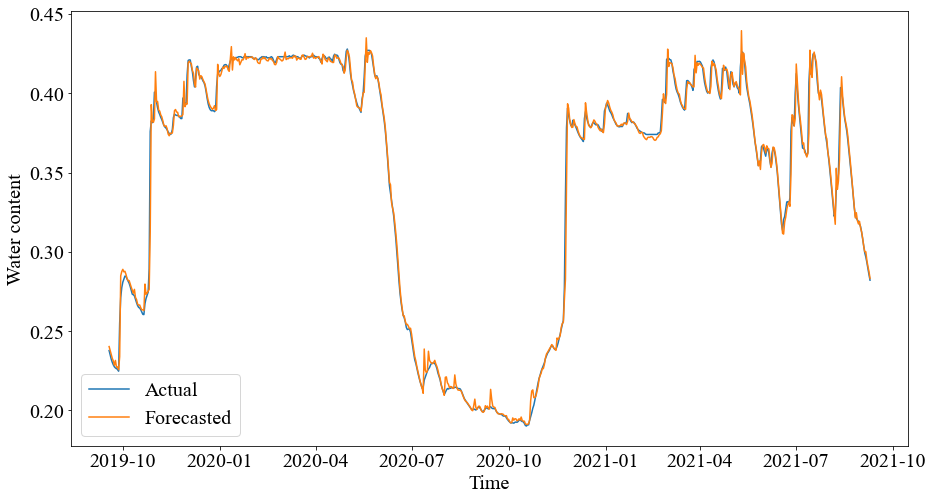

In [56]:
# create figure and axis objects with subplots()
d =pd.read_csv('C:/Users/ASUS/Desktop/data.csv', parse_dates = ['date'])
# d= log(d)

width = 15
height = 8
plt.figure(figsize=(width,height))
plt.rcParams.update({'font.size': 20, 'font.family':'Times New Roman'})
x1 = df_forecast.date
y1 = act_value
plt.plot(x1, y1, label = "Actual")
 
# line 2 points
x2 = df_forecast.date
y2 = df_forecast.VWC_1ft_Avg
# plotting the line 2 points
plt.plot(x2, y2, label = "Forecasted")
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Water content')
# giving a title to my graph
plt.title('')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

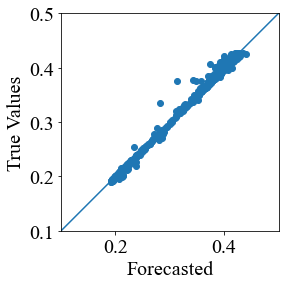

In [57]:
a = plt.axes(aspect='equal')
plt.scatter(df_forecast.VWC_1ft_Avg,act_value )
plt.xlabel('Forecasted')
plt.ylabel('True Values')
lims = [0.1,0.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

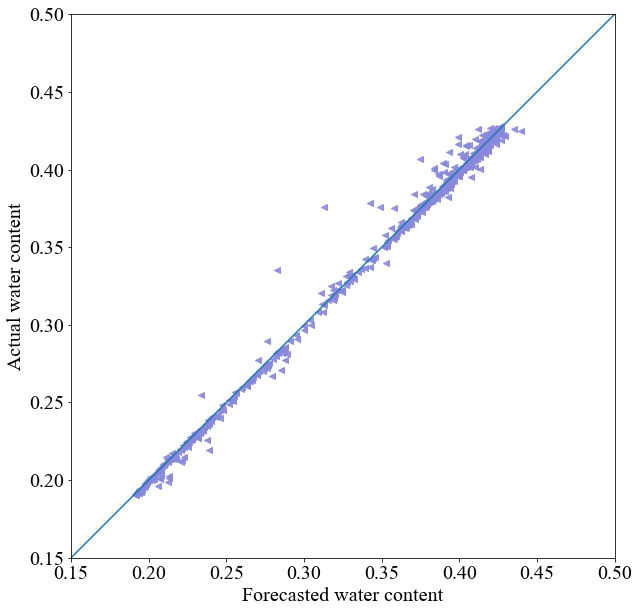

In [58]:
width = 10
height = 10
plt.figure(figsize=(width,height))
plt.rcParams.update({'font.size': 20, 'font.family':'Times New Roman'})
plt.axes(aspect='equal')
plt.scatter(df_forecast.VWC_1ft_Avg,act_value , color = '#88d9', alpha=0.9, marker = '<')
plt.xlabel('Forecasted water content')
plt.ylabel('Actual water content')
lims = [0.15,0.5]

plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [59]:
type(df_forecast.VWC_1ft_Avg)

pandas.core.series.Series

In [60]:
c = df_forecast.VWC_1ft_Avg
act_WC = pd.DataFrame(data=act_value.values)
df_forecast_big = pd.DataFrame(data=df_forecast.VWC_1ft_Avg.values)
df_forecast_big

,0
0,0.240291
1,0.237747
2,0.235028
3,0.232883
4,0.231236
...,...
718,0.300057
719,0.294632
720,0.290806
721,0.287523


In [61]:
error_big = act_WC - df_forecast_big
error_big

,0
0,-0.002499
1,-0.002664
2,-0.002695
3,-0.002508
4,-0.002486
...,...
718,-0.003265
719,-0.001257
720,-0.001473
721,-0.001898


In [62]:
# error = act_WC - df_forecast.VWC_1ft_Avg



In [63]:
n_predict = 120
# forecast_period_dates = pd.date_range(list(train_dates))
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_predict, freq= 'D').tolist()
forecast = model.predict(trainX[-n_predict:])
forecast_copies = np.repeat(forecast,df_for_training.shape[1], axis= 1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y = [row[5] for row in y_pred_future]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'VWC_1ft_Avg':y})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])
act_week = test['VWC_1ft_Avg'].head(n_predict)

In [64]:
mae = mean_absolute_error(act_week,df_forecast.VWC_1ft_Avg)
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(act_week,df_forecast.VWC_1ft_Avg)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 0.117368
MSE: 0.015805
RMSE: 0.125719


In [65]:
n_predict = 7
# forecast_period_dates = pd.date_range(list(train_dates))
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_predict, freq= 'D').tolist()
forecast = model.predict(trainX[-n_predict:])
forecast_copies = np.repeat(forecast,df_for_training.shape[1], axis= 1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y = [row[5] for row in y_pred_future]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'VWC_1ft_Avg':y})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])
act_week = test['VWC_1ft_Avg'].head(n_predict)

In [66]:
mae = mean_absolute_error(act_week,df_forecast.VWC_1ft_Avg)
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(act_week,df_forecast.VWC_1ft_Avg)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 0.020809
MSE: 0.000435
RMSE: 0.020867


In [67]:
l = [0,1,2,3,4,5]
l[+2:]

[2, 3, 4, 5]

In [68]:
n_predict = 14
# forecast_period_dates = pd.date_range(list(train_dates))
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_predict, freq= 'H').tolist()
forecast = model.predict(trainX[-n_predict:])
forecast_copies = np.repeat(forecast,df_for_training.shape[1], axis= 1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y = [row[5] for row in y_pred_future]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'VWC_1ft_Avg':y})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])
act_week = test['VWC_1ft_Avg'].head(n_predict)

In [69]:
mae = mean_absolute_error(act_week,df_forecast.VWC_1ft_Avg)
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(act_week,df_forecast.VWC_1ft_Avg)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 0.032985
MSE: 0.001097
RMSE: 0.033128


In [70]:
import pandas as pd
# import researchpy as rp
import scipy.stats as stats

In [71]:
stats.ttest_ind(df_forecast.VWC_1ft_Avg,act_week)

Ttest_indResult(statistic=11.470518469607791, pvalue=1.1319228614231794e-11)

In [72]:
stats.ttest_ind(act_week,
                 df_forecast.VWC_1ft_Avg, equal_var = False)

Ttest_indResult(statistic=-11.470518469607791, pvalue=4.9408753447550204e-11)

In [73]:
df_for_test.date_range('2020-02-23','2020-10-30')

AttributeError: 'DataFrame' object has no attribute 'date_range'

In [74]:
df_test_cropping = pd.read_csv('C:/Users/ASUS/Desktop/cropppingseason_test.csv', parse_dates = ['date'], index_col='date')

In [75]:
test_dates_cropping = pd.to_datetime(df_test_cropping.index)
test_dates_cropping

DatetimeIndex(['2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='date', length=253, freq=None)

In [76]:
cols_test_croping = list(df_test_cropping)[0:7] 
df_for_test_cropping = df_test_cropping[cols_test_croping].astype(float)

In [77]:
scaler2 = scaler.fit(df_for_test_cropping)
df_for_test_scaled_cropping = scaler2.transform(df_for_test_cropping)

In [78]:
test_X = []
test_Y=[]
n_future= 1
n_past=7

In [79]:
for i in range (n_past, len(df_for_test_scaled_cropping) - n_future +1):
    test_X.append(df_for_test_scaled_cropping[i - n_past:i, 0:df_for_test_scaled_cropping.shape[1]])
    test_Y.append(df_for_test_scaled_cropping[i + n_future -1:i+n_future, 5])

In [80]:
# testX, testY = np.array(testX), np.array(testY)
test_X = np.asarray(test_X)
test_Y = np.asarray(test_Y)
len(test_Y)

246

In [81]:
n_predict = len(test_X)+8

predict_period_dates_cropping = pd.date_range('2020-02-21', periods= n_predict, freq= 'D').tolist()
predict_period_dates_cropping = predict_period_dates_cropping[+8:]
predict_period_dates_cropping

[Timestamp('2020-02-29 00:00:00', freq='D'),
 Timestamp('2020-03-01 00:00:00', freq='D'),
 Timestamp('2020-03-02 00:00:00', freq='D'),
 Timestamp('2020-03-03 00:00:00', freq='D'),
 Timestamp('2020-03-04 00:00:00', freq='D'),
 Timestamp('2020-03-05 00:00:00', freq='D'),
 Timestamp('2020-03-06 00:00:00', freq='D'),
 Timestamp('2020-03-07 00:00:00', freq='D'),
 Timestamp('2020-03-08 00:00:00', freq='D'),
 Timestamp('2020-03-09 00:00:00', freq='D'),
 Timestamp('2020-03-10 00:00:00', freq='D'),
 Timestamp('2020-03-11 00:00:00', freq='D'),
 Timestamp('2020-03-12 00:00:00', freq='D'),
 Timestamp('2020-03-13 00:00:00', freq='D'),
 Timestamp('2020-03-14 00:00:00', freq='D'),
 Timestamp('2020-03-15 00:00:00', freq='D'),
 Timestamp('2020-03-16 00:00:00', freq='D'),
 Timestamp('2020-03-17 00:00:00', freq='D'),
 Timestamp('2020-03-18 00:00:00', freq='D'),
 Timestamp('2020-03-19 00:00:00', freq='D'),
 Timestamp('2020-03-20 00:00:00', freq='D'),
 Timestamp('2020-03-21 00:00:00', freq='D'),
 Timestamp

In [82]:
forecast = model.predict(test_X)
forecast

array([[0.96251243],
       [0.9656263 ],
       [0.9757353 ],
       [0.99348474],
       [0.968196  ],
       [0.97328687],
       [0.9720377 ],
       [0.97333455],
       [0.9749907 ],
       [0.9767759 ],
       [0.9755787 ],
       [0.97926813],
       [0.97707045],
       [0.9811878 ],
       [0.9704546 ],
       [0.97384375],
       [0.9731187 ],
       [0.9715388 ],
       [0.97132236],
       [0.98339605],
       [0.9825274 ],
       [0.9784306 ],
       [0.9685283 ],
       [0.96901685],
       [0.9767159 ],
       [0.9782412 ],
       [0.9776742 ],
       [0.9808357 ],
       [0.9797706 ],
       [0.99216604],
       [0.9747757 ],
       [0.9767825 ],
       [0.97165895],
       [0.9767438 ],
       [0.9784131 ],
       [0.9811419 ],
       [0.9727565 ],
       [0.9681554 ],
       [0.96104646],
       [0.98979306],
       [0.98355556],
       [0.9720117 ],
       [0.9663748 ],
       [0.96481156],
       [0.97618335],
       [0.9721552 ],
       [0.9651724 ],
       [0.962

In [83]:
forecast_copies = np.repeat(forecast,df_for_training.shape[1], axis= 1)

forecast_copies
y_pred_future = scaler.inverse_transform(forecast_copies)
y = [row[5] for row in y_pred_future]

In [84]:
forecast_dates_cropping = []
for time_i in predict_period_dates_cropping:
    forecast_dates_cropping.append(time_i.date())

In [85]:
df_forecast_cropping = pd.DataFrame({'date':np.array(forecast_dates_cropping), 'VWC_1ft_Avg':y})
df_forecast_cropping['date'] = pd.to_datetime(df_forecast_cropping['date'])

In [86]:
df_forecast_cropping

,date,VWC_1ft_Avg
0,2020-02-29,0.418925
1,2020-03-01,0.419665
2,2020-03-02,0.422067
3,2020-03-03,0.426285
4,2020-03-04,0.420276
...,...,...
241,2020-10-27,0.210650
242,2020-10-28,0.212786
243,2020-10-29,0.215499
244,2020-10-30,0.220383


In [87]:
act_value_cropping = df_test_cropping['VWC_1ft_Avg']
act_value_cropping=act_value_cropping[-246:]
act_value_cropping

date
2020-02-29    0.423000
2020-03-01    0.423000
2020-03-02    0.423000
2020-03-03    0.423000
2020-03-04    0.423000
                ...   
2020-10-27    0.210333
2020-10-28    0.213792
2020-10-29    0.217292
2020-10-30    0.220292
2020-10-31    0.222417
Name: VWC_1ft_Avg, Length: 246, dtype: float64

In [88]:
forecst = "desktop/data_cropping.csv"
df_forecast_cropping.to_csv(forecst, index=True, header=True)

In [89]:
n_predict = 7
# forecast_period_dates = pd.date_range(list(train_dates))
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_predict, freq= 'D').tolist()
forecast = model.predict(trainX[-n_predict:])
forecast_copies = np.repeat(forecast,df_for_training.shape[1], axis= 1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y = [row[5] for row in y_pred_future]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'VWC_1ft_Avg':y})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])
act_week = test['VWC_1ft_Avg'].head(n_predict)

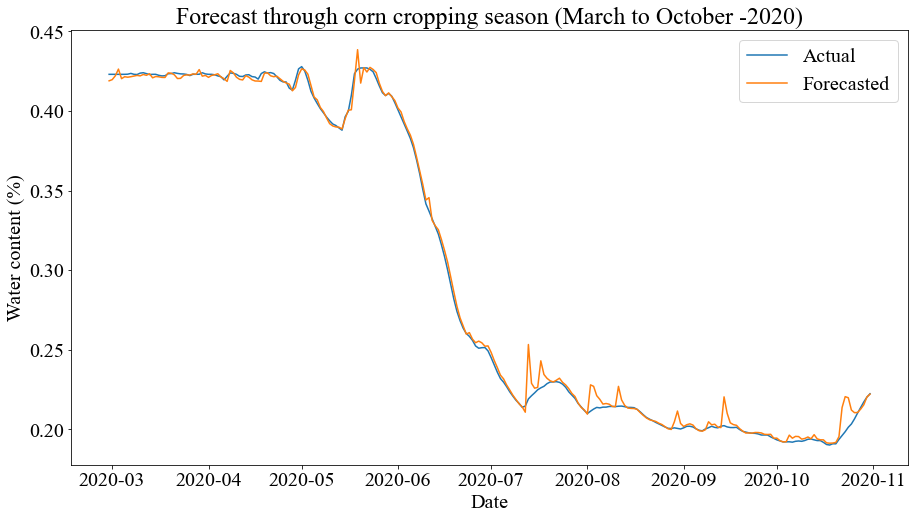

In [90]:


width = 15
height = 8
plt.figure(figsize=(width,height))
plt.rcParams.update({'font.size': 20, 'font.family':'Times New Roman'})
x1 = df_forecast_cropping['date']
y1 = act_value_cropping
plt.plot(x1, y1, label = "Actual")
 
# line 2 points
x2 = df_forecast_cropping['date']
y2 = df_forecast_cropping.VWC_1ft_Avg
# plotting the line 2 points
plt.plot(x2, y2, label = "Forecasted")
 
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Water content (%)')
# giving a title to my graph
plt.title('Forecast through corn cropping season (March to October -2020)')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

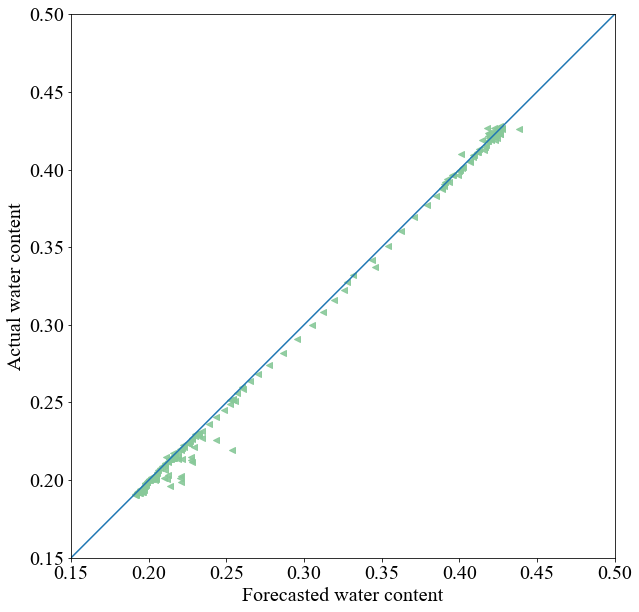

In [91]:
width = 10
height = 10
plt.figure(figsize=(width,height))
plt.axes(aspect='equal')
plt.scatter(df_forecast_cropping.VWC_1ft_Avg,act_value_cropping , color = '#88c999', alpha=0.9, marker = '<')
plt.xlabel('Forecasted water content')
plt.ylabel('Actual water content')
lims = [0.15,0.5]

plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<h> residual Analysis

In [92]:
f = df_forecast_cropping.VWC_1ft_Avg
act_WC_cropping = pd.DataFrame(data=act_value_cropping.values)
df_forecast_cropping = pd.DataFrame(data=df_forecast_cropping.VWC_1ft_Avg.values)
df_forecast_cropping

,0
0,0.418925
1,0.419665
2,0.422067
3,0.426285
4,0.420276
...,...
241,0.210650
242,0.212786
243,0.215499
244,0.220383


Text(0.5, 0, 'Error')

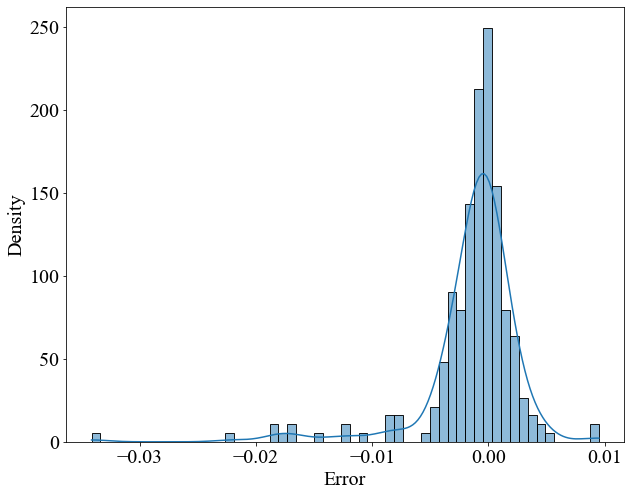

In [93]:
error_cropping = act_WC_cropping - df_forecast_cropping
import seaborn as sns

# sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
sns.histplot(error_cropping, element="bars",
    stat="density", kde=True, line_kws= {'color':'red'}, common_norm=False, legend = False)
plt.xlabel('Error')


<AxesSubplot:ylabel='Density'>

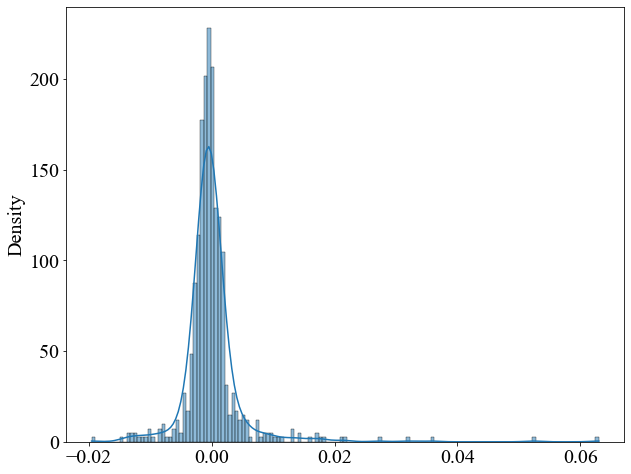

In [94]:
import seaborn as sns

# sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
sns.histplot(error_big, element="bars",
    stat="density", kde=True, line_kws= {'color':'red'}, common_norm=False, legend = False)



In [3]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

AttributeError: module 'numpy' has no attribute 'MachAr'

In [96]:
#croppings
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sm.stats.diagnostic.het_goldfeldquandt(error_cropping, act_WC_cropping)
lzip(name, test)

[('F statistic', 3.6849403864957466), ('p-value', 1.7528269383324377e-12)]

In [97]:
error_cropping.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of             0
0    0.004075
1    0.003335
2    0.000933
3   -0.003285
4    0.002724
..        ...
241 -0.000316
242  0.001006
243  0.001792
244 -0.000091
245  0.000238

[246 rows x 1 columns]>

In [98]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan(error_cropping, act_WC_cropping)
lzip(name, test)

[('Lagrange multiplier statistic', 7.183626015606691),
 ('p-value', nan),
 ('f-value', 7.369630249635465),
 ('f p-value', 0.007105130339212749)]

In [99]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(error_cropping)
lzip(name, test)

[('Jarque-Bera', array([3220.16646265])),
 ('Chi^2 two-tail prob.', array([0.])),
 ('Skew', array([-3.23890167])),
 ('Kurtosis', array([19.49850434]))]

In [100]:
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sm.stats.diagnostic.het_white(error_cropping, act_WC_cropping)
lzip(name, test)

ValueError: White's heteroskedasticity test requires exog tohave at least two columns where one is a constant.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
a= durbin_watson(error_cropping)
a

Text(0.5, 0, 'Lags')

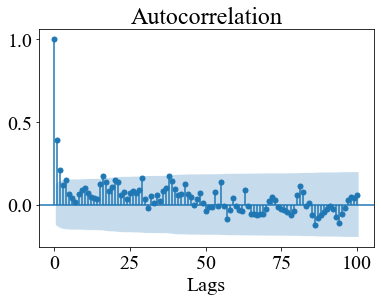

In [101]:
import statsmodels.tsa.api as smt

smt.graphics.plot_acf(error_cropping, lags=100 , alpha=0.05)
plt.xlabel("Lags")

In [102]:
p_value_thresh=0.05
from statsmodels.stats.diagnostic import normal_ad

p_value = normal_ad(error_cropping)[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value, p_value1)
    
    # Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
      print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')

sns.distplot(error_cropping, bins= 12)
plt.show()
    
print()
if p_value > p_value_thresh:
    print('Assumption satisfied')
    
else:
    print('Assumption not satisfied')
    print()
    print('Confidence intervals will likely be affected')
    print('Try performing nonlinear transformations on variables')


NameError: name 'p_value1' is not defined

In [103]:
mae = mean_absolute_error(act_WC_cropping, df_forecast_cropping)
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(act_WC_cropping, df_forecast_cropping)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
from sklearn.linear_model import LinearRegression

MAE: 0.002430
MSE: 0.000021
RMSE: 0.004613


In [104]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(act_WC_cropping, df_forecast_cropping))

r2_score 0.9978704311929918


In [105]:
a= act_WC_cropping-df_forecast_cropping
a

,0
0,0.004075
1,0.003335
2,0.000933
3,-0.003285
4,0.002724
...,...
241,-0.000316
242,0.001006
243,0.001792
244,-0.000091


In [106]:
b = a.to_numpy()
b

array([[ 4.07465506e-03],
       [ 3.33472300e-03],
       [ 9.32566404e-04],
       [-3.28514767e-03],
       [ 2.72410321e-03],
       [ 1.51436734e-03],
       [ 1.89453147e-03],
       [ 2.08637546e-03],
       [ 1.10950279e-03],
       [ 5.60296535e-04],
       [ 1.71978951e-03],
       [ 1.09309459e-03],
       [ 1.07362388e-03],
       [-4.88089561e-04],
       [ 2.18739319e-03],
       [ 1.38204503e-03],
       [ 9.29332256e-04],
       [ 9.29752111e-04],
       [ 1.10619092e-03],
       [-5.12819052e-04],
       [-2.23075167e-04],
       [ 1.29208469e-03],
       [ 3.22846006e-03],
       [ 2.82071401e-03],
       [ 9.07875046e-04],
       [ 2.53753201e-04],
       [-3.19814697e-04],
       [-2.79404640e-04],
       [-2.63233185e-05],
       [-2.93013905e-03],
       [ 2.16058397e-03],
       [ 9.33746815e-04],
       [ 1.90120149e-03],
       [ 6.92896128e-04],
       [ 4.59001904e-06],
       [-1.35218191e-03],
       [ 1.40401363e-04],
       [-7.66270638e-04],
       [ 3.2

In [107]:
b.mean()

-0.0013935479347883721

In [108]:
c= error_big.to_numpy()
c

array([[-2.49922844e-03],
       [-2.66381435e-03],
       [-2.69453124e-03],
       [-2.50806594e-03],
       [-2.48645782e-03],
       [-9.52649673e-04],
       [-4.72013179e-03],
       [-9.14456169e-04],
       [-1.43135691e-03],
       [-9.58094199e-04],
       [ 2.09856170e-02],
       [-1.37144185e-02],
       [-1.01202464e-02],
       [-8.05586012e-03],
       [-4.56005780e-03],
       [-3.03812591e-03],
       [-1.21998771e-03],
       [-3.22101911e-04],
       [-2.99220959e-04],
       [-1.65964762e-03],
       [-1.60418749e-03],
       [-2.05074787e-03],
       [-2.49696835e-03],
       [-9.68014161e-04],
       [-4.09730935e-03],
       [-1.24061879e-03],
       [-1.97464895e-03],
       [-9.58105405e-04],
       [-1.41598344e-03],
       [-1.90071861e-03],
       [-1.26105746e-03],
       [-1.37169997e-03],
       [-2.91148607e-03],
       [-2.52129332e-03],
       [-1.23539223e-02],
       [-2.71266826e-03],
       [-1.51489321e-03],
       [-7.16609240e-04],
       [ 1.3

In [109]:
c.mean()

2.1092272157839167e-05

In [113]:
import pickle
lstmmoisture = 'finalized_model.sav'
pickle.dump(model, open(lstmmoisture, 'wb'))

TypeError: cannot pickle '_thread.RLock' object